$
\newcommand{\Tau}{\mathcal{T}}
\newcommand{\bm}[1]{{\boldsymbol{#1}}}
\newcommand{\dt}[1]{{\frac{d#1}{dt}}}
%\newcommand{\bm}{\mathbf{#1}}
\newcommand{\trsp}{{\scriptscriptstyle\top}}$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pbdlib as pbd

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Hidden Markov Model and LQR
This is an example of learning a HMM over some trajectories demonstrations and reproducing it using optimal control.
More infos : http://calinon.ch/papers/Calinon-JIST2015.pdf, http://calinon.ch/papers/Calinon-HFR2016.pdf


## Learning Hidden Markov Model (HMM)

In [2]:
path = os.path.dirname(pbd.__file__) + '/data/signs/'
signs = ['sign_0']

file_lists = []

for i in range(1, 34):
    list_file = open(path +'/train_list_-Signer2-sbj1.txt')
    file_lists += [[f.strip() for f in list_file.readlines() if 'sign%d_' % i in f]]

In [3]:
path = os.path.dirname(pbd.__file__) + '/data/signs/'
signs = ['sign_0']

test_file_lists = []

for i in range(1, 34):
    list_file = open(path +'/test_list_Signer2-sbj1.txt')
    test_file_lists += [[f.strip() for f in list_file.readlines() if 'sign%d_' % i in f]]

In [4]:
demos = []

for file_list in file_lists:
    demos += [[np.loadtxt(path + f + '.txt') for f in file_list]]

In [5]:
test_demos = []

for file_list in test_file_lists:
    test_demos += [[np.loadtxt(path + f + '.txt') for f in file_list]]

### Plotting demos 

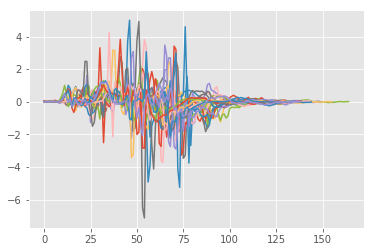

In [52]:
for d in demos[5]:
    plt.plot(d[:, 6])

### Creating dependencies for covariance matrix
Full covariance for position of each hand in each coordinate system. Diagonal for velocities:

In [39]:
dep = []

for j in range(0, 36, 12):
    # (0:3) left hand position (3:6) right hand position (6:9) left hand velocity (9:12) right hand velocity
    
    # dep += [slice(0+j, 3+j), slice(3+j, 6+j)] + [[i+j] for i in range(6, 12)]
    
    # (0:6) left right hand position (6:9) left hand velocity (9:12) right hand velocity
    # dep += [slice(0+j, 6+j)] + [[i+j] for i in range(6, 12)]
    
    
    # dep += [[0+j, 1 + j, 2+j, 6 + j, 7 + j, 8 +j], [3 + j, 4 + j, 5 + j, 9 + j, 10 + j, 11 + j]]
    
    dep += [slice(j, 12 + j)] 

print dep

[slice(0, 12, None), slice(12, 24, None), slice(24, 36, None)]


## Training models for all signs 

In [50]:
models = []

for i, d in enumerate(demos):
    print "training model for %s" % i
    models += [pbd.HMM(nb_states=9, nb_dim=36)]
    
    success = False
    while not success:
        models[i].init_hmm_kbins(demos[i]) # initializing model
        # models[i].gmm_init(demos[i]) # initializing model
        # EM to train model
        success = models[i].em(demos[i], reg=1e-1, dep=dep, left_to_right=True)
        # success = models[i].em(demos[i], reg=1e-1)
        # success = models[i].em(demos[i], reg=1e-1, cov_type='diag', left_to_right=True)
        

training model for 0
EM converges
training model for 1
EM converges
training model for 2
EM converges
training model for 3
EM converges
training model for 4
EM converges
training model for 5
EM converges
training model for 6
EM converges
training model for 7
EM converges
training model for 8
EM converges
training model for 9
EM converges
training model for 10
EM converges
training model for 11
EM converges
training model for 12
EM converges
training model for 13
EM converges
training model for 14
EM converges
training model for 15
EM converges
training model for 16
EM converges
training model for 17
EM converges
training model for 18
EM converges
training model for 19
EM converges
training model for 20
EM converges
training model for 21
EM converges
training model for 22
EM converges
training model for 23
EM converges
training model for 24
EM converges
training model for 25
EM converges
training model for 26
EM converges
training model for 27
EM converges
training model for 28
EM conve

In [53]:
good_classification = []
for demo_idx in range(0, 33):

    scores = []
    for i, model in enumerate(models):
         scores += [np.array(model.score(test_demos[demo_idx]))]
            
    scores = np.array(scores)
    scores[np.isnan(scores)] = np.inf
    good_classification += [np.argmin(scores, axis=0) == demo_idx]
    print good_classification[-1]

[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[False False False False  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True False  True]
[ True  True  True  True  True  True]
[ True False False False False False]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]
[ True False False  True  True False]
[ True  True

In [42]:
ratio = [float(np.sum(g))/len(g) for g in good_classification]


In [43]:
np.mean(ratio)

0.8989898989898989

### Plotting for all dimensions and coordinate systems 

ValueError: array must not contain infs or NaNs

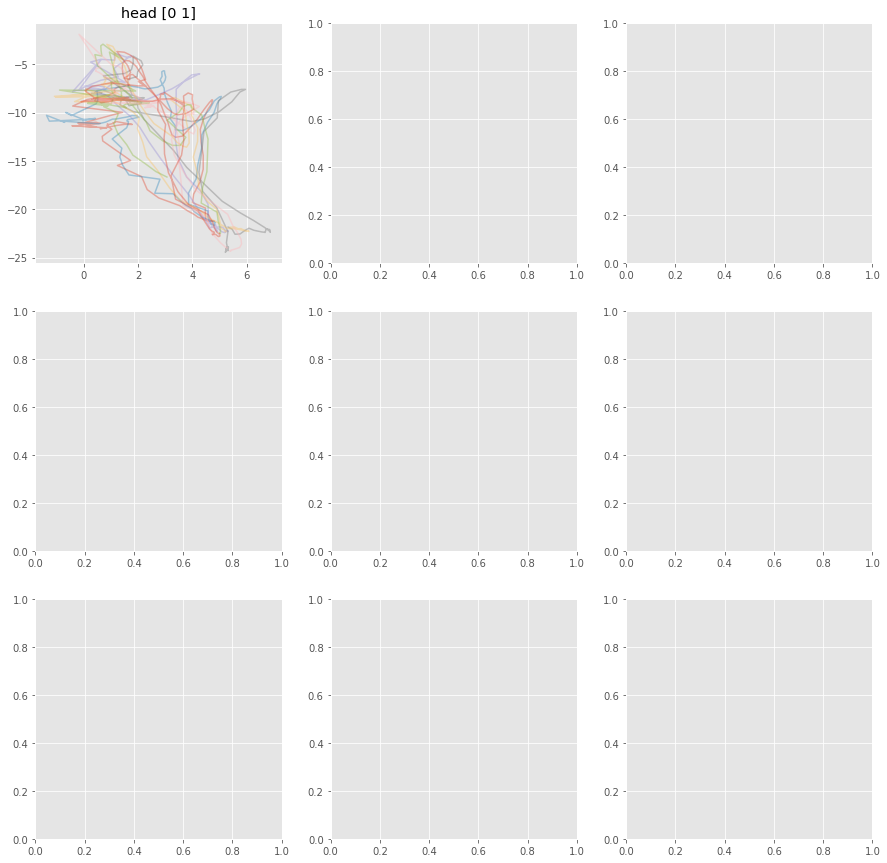

In [49]:
sign_idx = 0

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

refs = ['head', 'shoulder', 'hip']

dims = np.array([[0, 1], [0, 2], [1, 2]])

for i, j in enumerate(range(0, 36, 12)):
    for k, dim in enumerate(dims):
        for p in demos[sign_idx][::3]:
            ax[i, k].plot(p[:, dim[0] + j + 3], p[:, dim[1] + j + 3], alpha=0.4)

        ax[i, k].set_title(refs[i] + ' ' + str(dim))
        models[sign_idx].plot(ax=ax[i, k], dim=(dim + j + 3).tolist(), alpha=0.4, color='steelblue')

### Get sequence of states 

In [48]:
for i, d in enumerate(demos):
    sq = model.viterbi(demos[i])

    plt.figure(figsize=(5, 1))
    # plt.axis('off')
    plt.plot(sq, lw=3);
    plt.xlabel('timestep');

KeyError: 0

## Create and solve LQR 

In [16]:
demo_idx = 0
lqr = pbd.PoGLQR(nb_dim=2, dt=0.01, horizon=demos_xdx[demo_idx].shape[0])
lqr.mvn_xi = model.concatenate_gaussian(sq)
lqr.mvn_u = -4.
lqr.x0 = demos_xdx[demo_idx][0]

xi = lqr.seq_xi

NameError: name 'demos_xdx' is not defined

## Plotting reproduced trajectory (position and velocity)

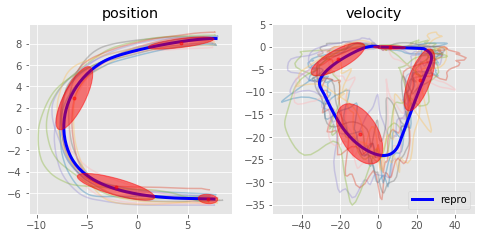

In [6]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(8,3.5)

# position plotting 
ax[0].set_title('position')
for p in demos_x:
    ax[0].plot(p[:, 0], p[:, 1], alpha=0.4)
    
ax[0].plot(xi[:, 0], xi[:, 1], 'b', lw=3)
pbd.plot_gmm(model.mu, model.sigma, ax=ax[0], dim=[0, 1]); 

# velocity plotting
ax[1].set_title('velocity')
for p in demos_dx:
    ax[1].plot(p[:, 0], p[:, 1], alpha=0.4)
    
ax[1].plot(xi[:, 2], xi[:, 3], 'b', lw=3, label='repro')

plt.legend()
pbd.plot_gmm(model.mu, model.sigma, ax=ax[1], dim=[2, 3]); 
